# Plotting and statistical packages

* Matplot/Seaborn
* pandas
* statsmodels

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

from sklearn.datasets import load_boston

import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set()

## Boston housing princes

In [3]:
# scikit-learn data set
df_dict = load_boston()
print(df_dict["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
type(df_dict)

sklearn.datasets.base.Bunch

In [5]:
features = pd.DataFrame(data = df_dict.data,columns=df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target,columns=['MEDV'])

In [6]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
print('the dimensions of target are:',target.shape)
print('the dimensions of features are:',features.shape)

the dimensions of target are: (506, 1)
the dimensions of features are: (506, 13)


In [9]:
df = pd.concat([features,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
for col in df.columns:
    print(col, df[col].nunique())

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
MEDV 229


/Users/BadWizard/anaconda3/lib/python3.4/site-packages/pandas/tools/plotting.py:3366: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


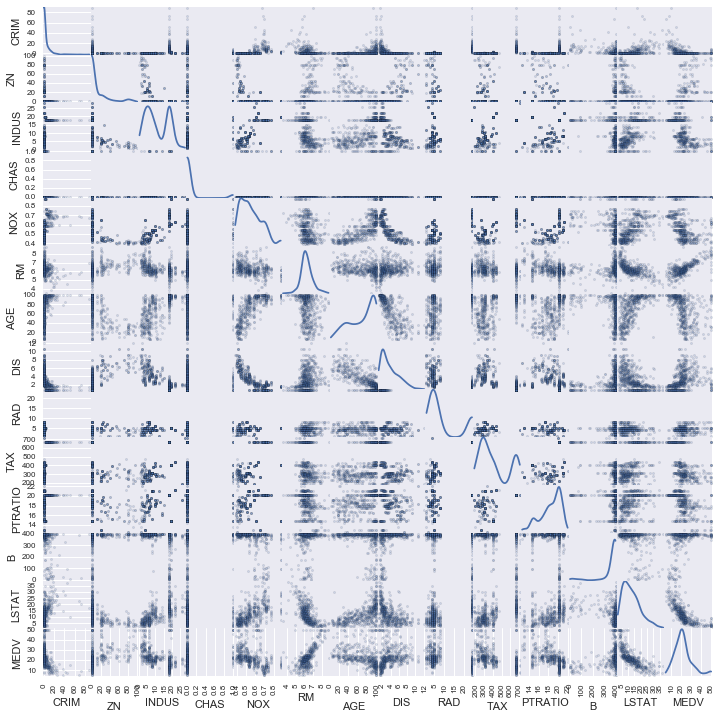

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df, alpha=0.2, diagonal='kde', ax=ax);

In [12]:
df.RAD.unique()

array([  1.,   2.,   3.,   5.,   4.,   8.,   6.,   7.,  24.])

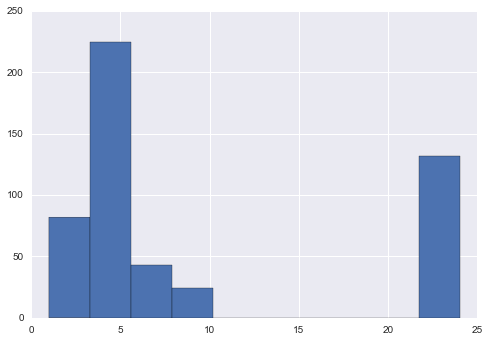

In [24]:
df['RAD'].hist()

In [13]:
# create a new boolian variable for each of the two groups
df['RAD_bool'] = df.RAD.apply(lambda x: x>15).astype('bool')

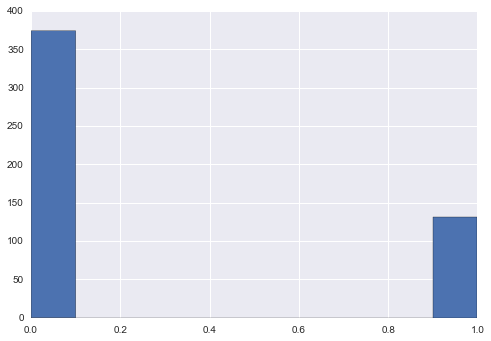

In [28]:
df['RAD_bool'].hist()

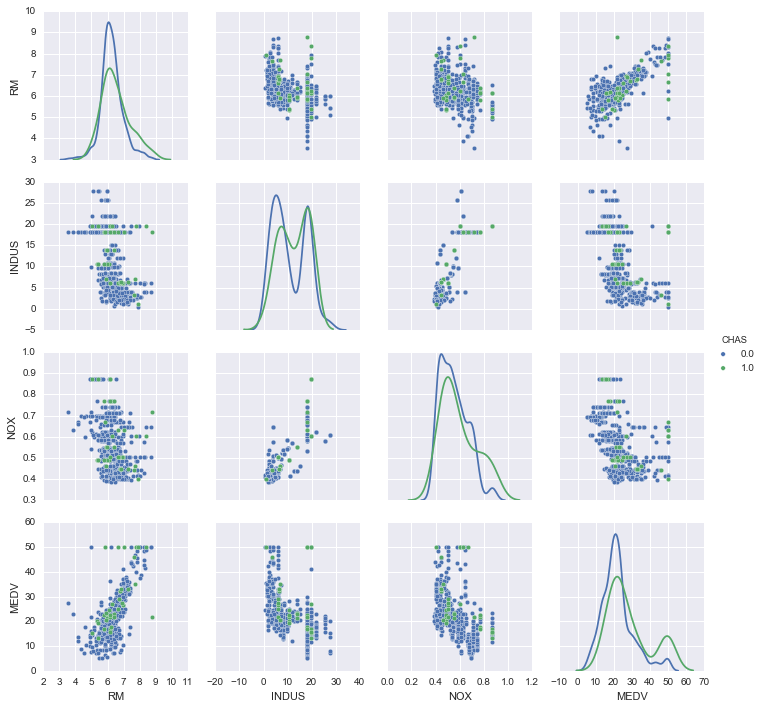

In [31]:
sns.pairplot(df,hue="CHAS",vars=['RM','INDUS','NOX','MEDV'],diag_kind='kde')

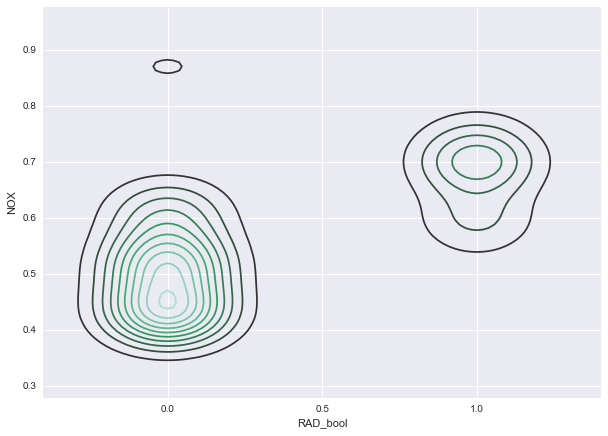

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.RAD_bool,df.NOX, ax = ax)

## Pandas plotting

In [36]:
from pandas.tools.plotting import andrews_curves


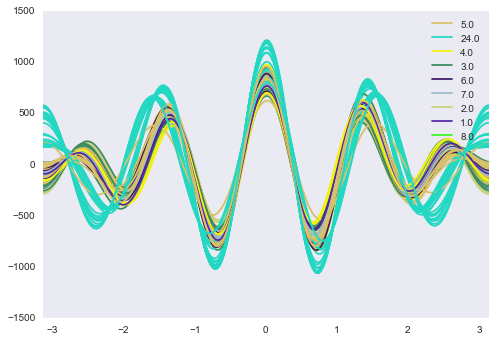

In [42]:
andrews_curves(df.sample(100), 'RAD')

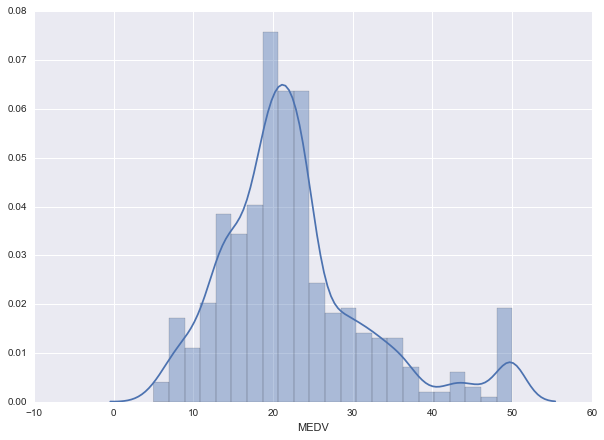

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(df.MEDV, ax = ax)

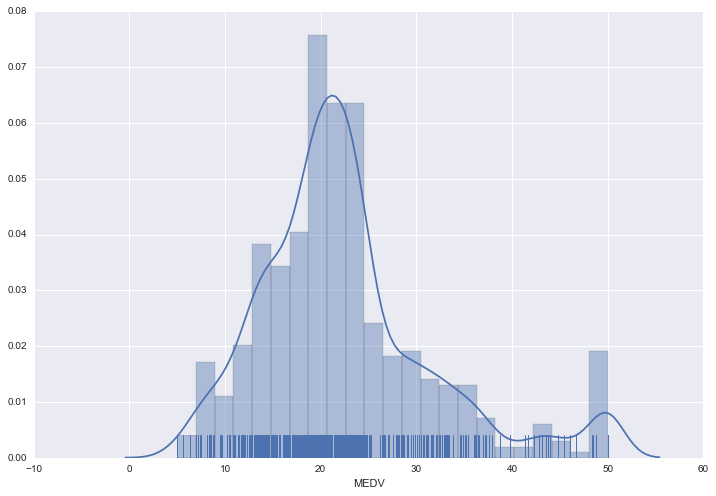

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df.MEDV, ax = ax,rug=True,hist = False)

In [48]:
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

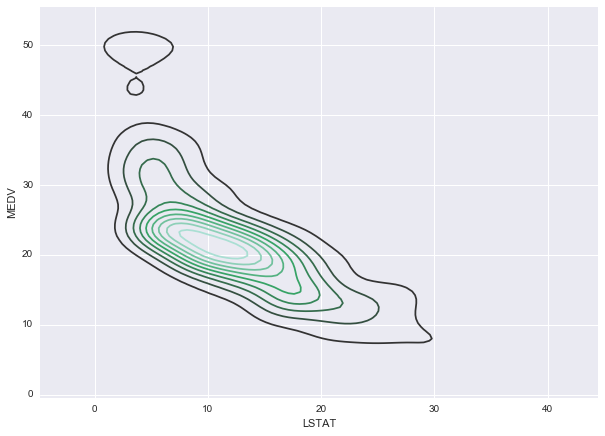

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.LSTAT,df.MEDV, ax= ax)

## Statsmodels

In [20]:
mod = ols(formula = '''MEDV ~ LSTAT + 1''',data=df).fit() 
# the I() function is one way to do this for variables that are not in the data frame
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 09 Apr 2016   Prob (F-statistic):           5.08e-88
Time:                        17:20:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
mod = ols(formula = '''MEDV ~ LSTAT + I(np.log(LSTAT)) + 1''',data=df).fit() 
# the I() function is one way to do this for variables that are not in the data frame
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     521.0
Date:                Sat, 09 Apr 2016   Prob (F-statistic):          2.67e-123
Time:                        17:22:50   Log-Likelihood:                -1556.3
No. Observations:                 506   AIC:                             3119.
Df Residuals:                     503   BIC:                             3131.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           57.4306      1.681     34.162      0.000        54.128    60.734
LSTAT                0.3804      0.099      3.830      0.000         0.185     0.576
I(np.log(LSTAT))   -16.7491      1.180    -14.188      0.000       -19.068   -14.430
==============================================================================
Omnibus:                      125.442   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.893
Skew:                           1.181   Prob(JB):                     1.58e-79
Kurtosis:                       6.411   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

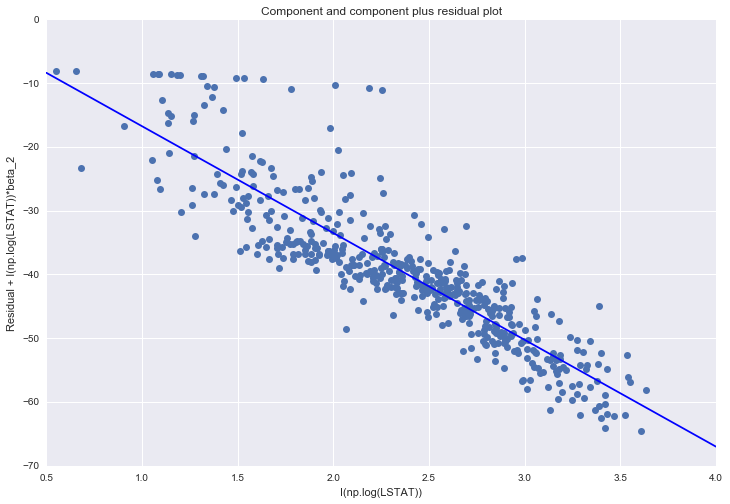

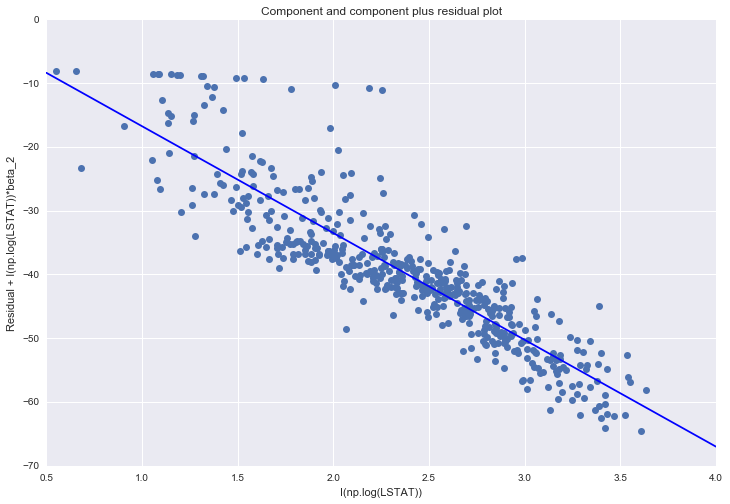

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
sm.graphics.plot_ccpr(mod, "I(np.log(LSTAT))", ax=ax)

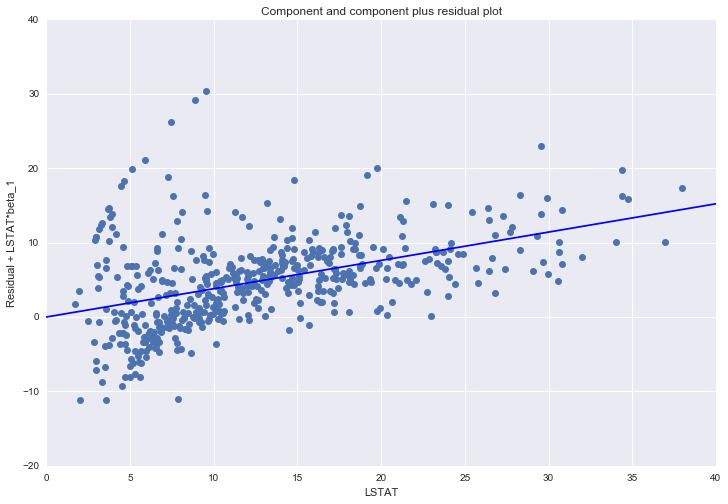

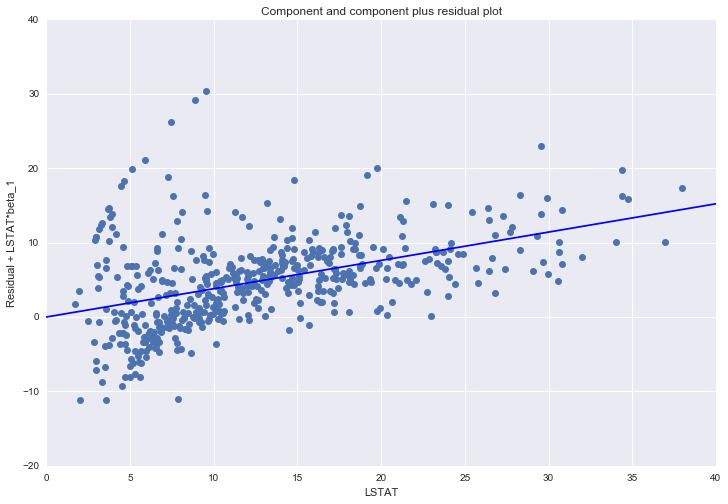

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
sm.graphics.plot_ccpr(mod, "LSTAT", ax=ax)

In [27]:
mod = ols(formula = '''MEDV ~ RM + C(RAD_bool) + LSTAT + I(np.log(LSTAT)) + 1''',data=df).fit() 
# the C() function takes care of the fact that RAD_bool is categorical variable
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     319.8
Date:                Sat, 09 Apr 2016   Prob (F-statistic):          2.08e-136
Time:                        17:26:03   Log-Likelihood:                -1519.5
No. Observations:                 506   AIC:                             3049.
Df Residuals:                     501   BIC:                             3070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              26.9506      3.821      7.054      0.000        19.444    34.457
C(RAD_bool)[T.True]    -1.5371      0.575     -2.672      0.008        -2.667    -0.407
RM                      3.6535      0.419      8.719      0.000         2.830     4.477
LSTAT                   0.3842      0.094      4.073      0.000         0.199     0.569
I(np.log(LSTAT))      -13.4283      1.164    -11.534      0.000       -15.716   -11.141
==============================================================================
Omnibus:                      160.256   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.495
Skew:                           1.337   Prob(JB):                    5.29e-160
Kurtosis:                       8.258   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
mod = ols(formula = '''MEDV ~ RM + C(RAD) + LSTAT + I(np.log(LSTAT)) + 1''',data=df).fit() 
# the C() function takes care of the fact that RAD_bool is categorical variable
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 09 Apr 2016   Prob (F-statistic):          3.53e-133
Time:                        17:52:28   Log-Likelihood:                -1507.9
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     494   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           24.7315      3.918      6.312      0.000        17.034    32.429
C(RAD)[T.2.0]        3.5281      1.467      2.406      0.017         0.647     6.410
C(RAD)[T.3.0]        4.6436      1.334      3.482      0.001         2.023     7.264
C(RAD)[T.4.0]        2.2448      1.186      1.893      0.059        -0.085     4.575
C(RAD)[T.5.0]        4.2367      1.174      3.608      0.000         1.930     6.544
C(RAD)[T.6.0]        3.2434      1.452      2.234      0.026         0.391     6.096
C(RAD)[T.7.0]        2.7369      1.592      1.720      0.086        -0.390     5.864
C(RAD)[T.8.0]        4.3731      1.470      2.975      0.003         1.485     7.262
C(RAD)[T.24.0]       1.7490      1.226      1.427      0.154        -0.660     4.158
RM                   3.4671      0.422      8.224      0.000         2.639     4.295
LSTAT                0.3653      0.093      3.909      0.000         0.182     0.549
I(np.log(LSTAT))   -13.2857      1.157    -11.486      0.000       -15.558   -11.013
==============================================================================
Omnibus:                      171.218   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              841.317
Skew:                           1.413   Prob(JB):                    2.04e-183
Kurtosis:                       8.649   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fit Quality

### Leverage

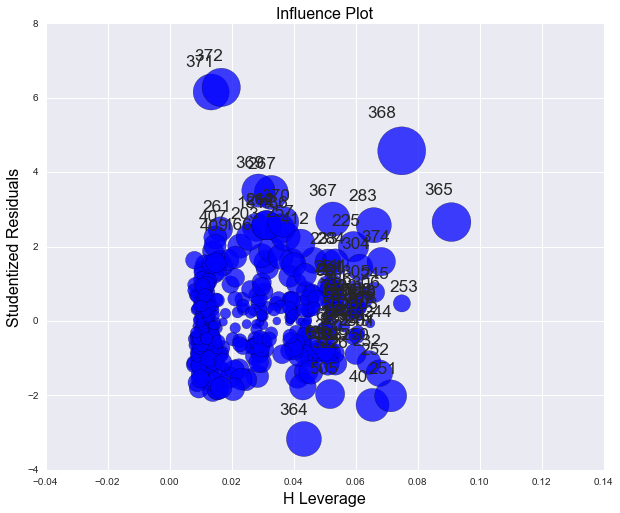

In [29]:
fig, ax = plt.subplots(figsize = (10,8))
fig = sm.graphics.influence_plot(mod, ax=ax, criterion='cooks',)

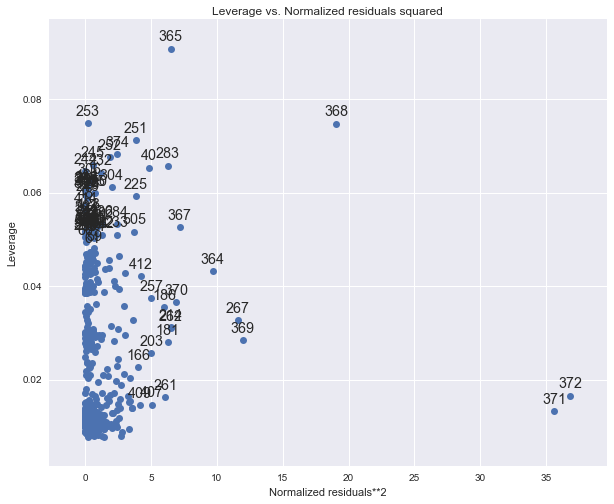

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.plot_leverage_resid2(mod, ax=ax)

## Partial regression

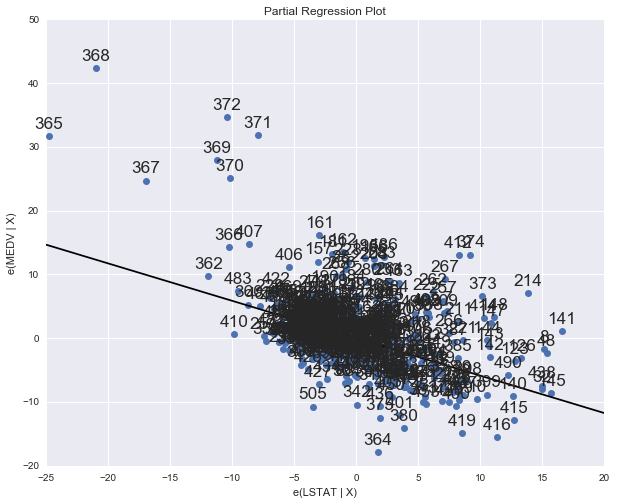

In [32]:
fig, ax = plt.subplots(figsize = (10,8))
fig = sm.graphics.plot_partregress("MEDV","LSTAT", ["RAD","RM"], data = df, ax = ax)

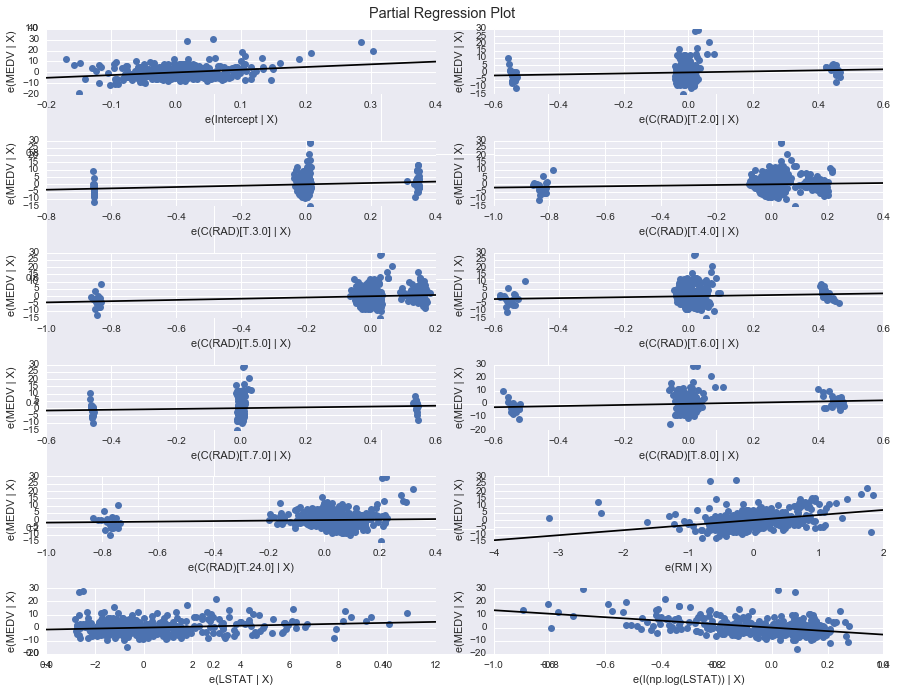

In [39]:
fig, ax = plt.subplots(figsize = (13,10))
fig = sm.graphics.plot_partregress_grid(mod, fig=fig)

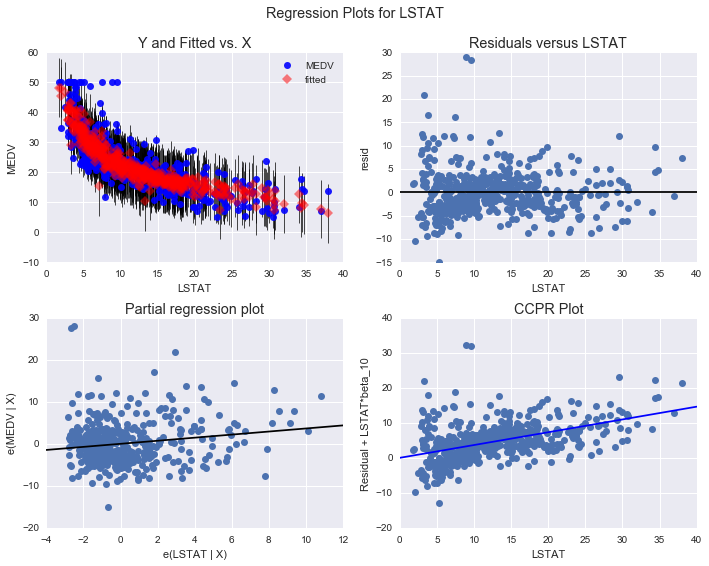

In [40]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(mod, "LSTAT", fig=fig)

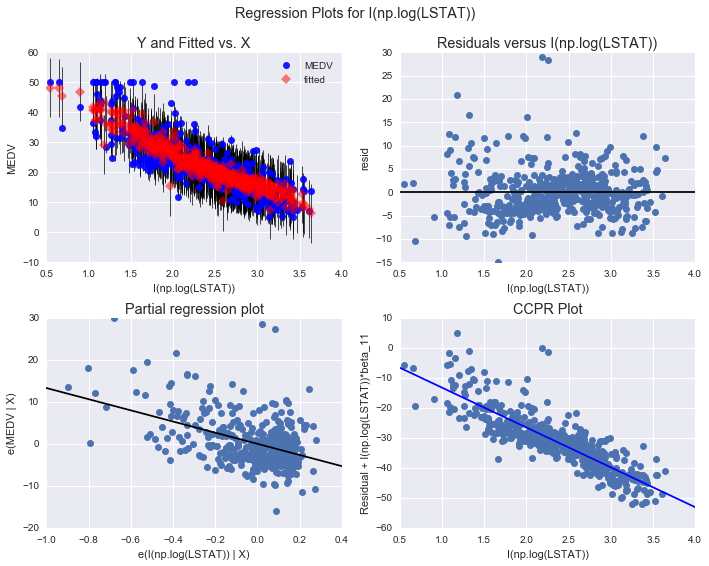

In [41]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(mod, "I(np.log(LSTAT))", fig=fig)